In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("Varun.wav")

fft_data = np.fft.fft(signal)
amplitude = np.abs(fft_data)

frequencies = np.fft.fftfreq(len(signal), d=1/sr)

print("FFT DATA:\n",fft_data)
print("Amplitude:\n",amplitude)
print("Frequencies:\n",frequencies)

FFT DATA:
 [-0.29947692+0.j          0.15737108-0.11074145j  0.20568227+0.18656677j
 ... -0.33965166-0.12483071j  0.20568227-0.18656677j
  0.15737108+0.11074145j]
Amplitude:
 [0.29947692 0.19243005 0.27769111 ... 0.36186455 0.27769111 0.19243005]
Frequencies:
 [ 0.          0.16801024  0.33602048 ... -0.50403072 -0.33602048
 -0.16801024]


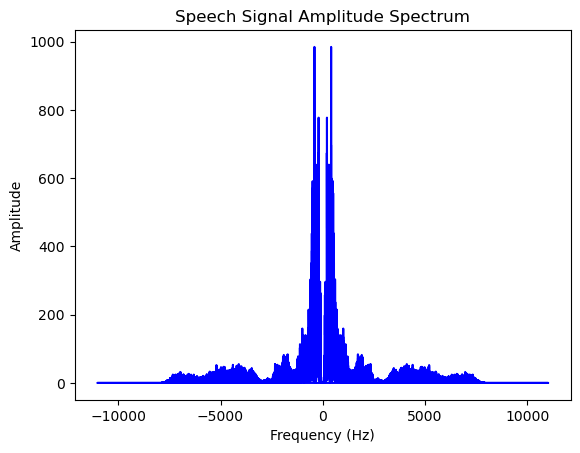

In [2]:
plt.plot(frequencies, amplitude,color = "blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.show()

In [3]:
time_domain = np.fft.ifft(fft_data)
time_domain = time_domain[:len(signal)]

C:\Users\varun\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


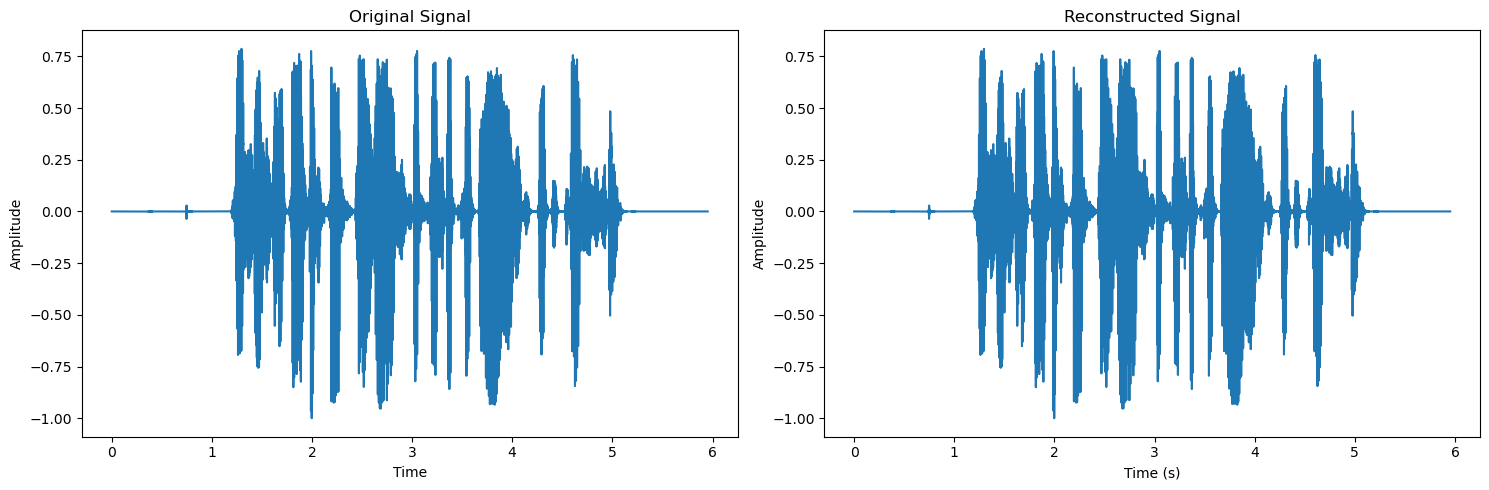

In [4]:
time = np.linspace(0, len(signal)/sr, len(signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time,signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

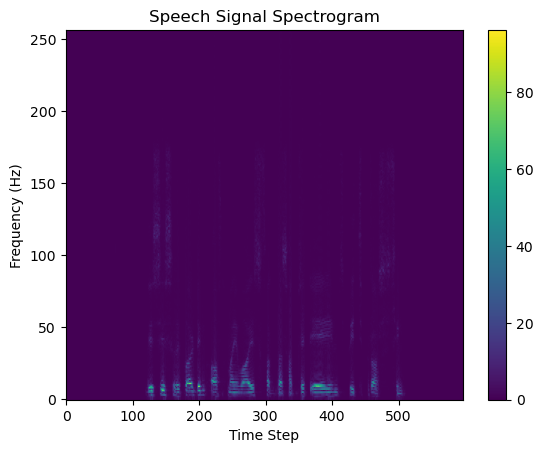

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("Varun.wav")
window_size = int(sr * 0.02)
hop_size = int(window_size / 2)
fft_size = 2 ** int(np.ceil(np.log2(window_size)))
freq_components = np.zeros((fft_size // 2 + 1, int(np.ceil(len(signal) / hop_size))))
for i in range(0, len(signal) - window_size + 1, hop_size):
    window = signal[i:i + window_size]
    padded_window = np.pad(window, (0, fft_size - len(window)), mode="constant")
    fft_result = np.fft.rfft(padded_window)
    freq_components[:, i // hop_size] = np.abs(fft_result[:fft_size // 2 + 1])  # Keep positive frequencies

plt.imshow(freq_components, aspect="auto", origin="lower")
plt.xlabel("Time Step")
plt.ylabel("Frequency (Hz)")
plt.title("Speech Signal Spectrogram")
plt.colorbar()
plt.show()